##  Ultimate challenge
                                    By Muluemebet 
                                       June ,2020

In [206]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, confusion_matrix, classification_report,roc_curve, roc_auc_score
    
from sklearn.linear_model import LogisticRegression
import seaborn as sns

%matplotlib inline

## Read the data

In [110]:
login= pd.read_json("logins.json")
ultimate= pd.read_json("ultimate_data_challenge.json")

In [111]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [8]:
#login.login_time=login.login_time.apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")) # parse in to datetime

## Part -1:   Exploratory    data    analysis

There is a daily cycle in the number of logins. Most logging occurs from 21 to 2hr  and from 11 to 12hr. There was an exceptionally large login on March 01, 1970 from 04:30 to 4:45 hr.


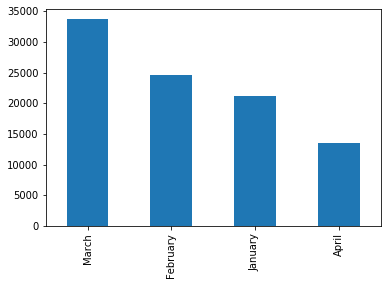

In [112]:
login.login_time.dt.strftime("%B").value_counts(dropna=False).plot(kind= "bar")

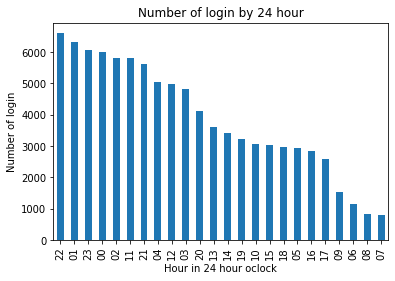

In [114]:
login.login_time.dt.strftime("%H").value_counts(dropna=False).plot(kind= "bar")
_=plt.xlabel("Hour in 24 hour oclock")
_=plt.ylabel("Number of login")
_=plt.title("Number of login by 24 hour")

In [117]:
login.index= login.login_time # make logine_time as index

In [118]:
login.columns=["time"] # rename the logine_time as time

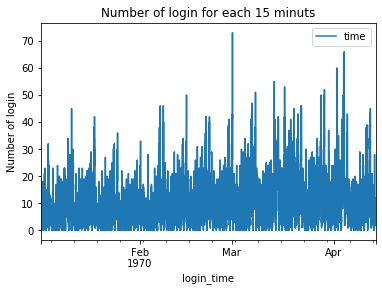

In [119]:
#count plot for each 15 minutes interval 
_=login.groupby(pd.Grouper(freq='15Min')).count().plot() 
_=plt.title("Number of login for each 15 minuts")
_=plt.ylabel("Number of login")

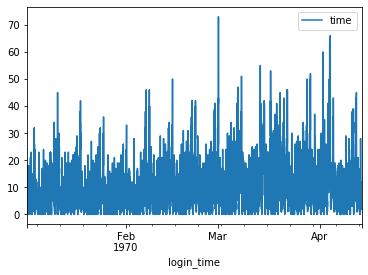

In [12]:
#count plot for each 15 minutes interval 
_=login.resample("15min").count().plot()

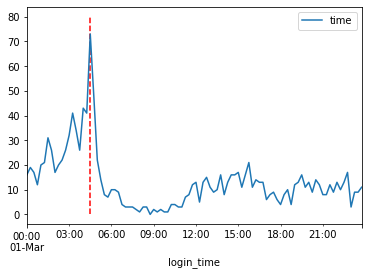

In [13]:
#count plot of a single day (Januaray 1st ) for 15 minutes interval 
login.loc["1970-03-01"].resample("15min").count().plot()
_=plt.vlines("1970-03-01 04:30", ymin= 0, ymax=80, color="r", linestyles="dashed") # March 1970 from 04:30 to 04:45

## Part -2: Experiment    and    metrics    design  

The neighboring cities of Gotham and Metropolis have  complementary  circadian  rhythms: on  weekdays, Ultimate Gotham  is most  active at night, and Ultimate Metropolis  is most active  during  the day. On weekends,  there  is  reasonable activity  in both  cities. However, a  toll bridge,  with  a  two  way  toll, between  the  two  cities  causes driver partners  to  tend  to be exclusive  to each  city.  The  Ultimate managers of  city operations  for  the  two  cities have  proposed an experiment  to  encourage driver partners  to be available  in both  cities, by  reimbursing all  toll  costs. 
1. What would  you  choose  as  the  key measure of  success of  this experiment in  encouraging driver  partners  to  serve both  cities, and why would  you  choose  this metric? 
2. Describe a practical  experiment  you would design  to  compare  the effectiveness of the  proposed  change  in  relation  to  the  key measure of  success. Please provide  details on:   a. how  you will  implement  the experiment  b. what  statistical  test(s)  you will   conduct  to  verify  the  significance of  the  observation  c. how  you would  interpret the  results and provide  recommendations  to  the  city  operations  team along with any  caveats.


**Solution:**

The key measure of success of this experiment is the number of times drivers availability to their neighbouring city is measured in terms of the number of times they cross the toll bridge for each day.   

**Steps to make experiment**


**Step_1 Define research questions and variables:** The objective of the experiment is to study the effect of reimbursing all     toll costs of drivers on drivers' availability in both Gotham and Metropolis. The dependent variable is the number of driver's trips between the two cities. The independent variable is whether the driver is told to be reimbursed or not. Other confounding variables such as gender, driving experience, age, distance from driver's residence location to the neighbouring city and  trip distance may affect drivers presence in both cities. 

**Step_2 Write  the hypothesis:** 

    H0= Reimbursement of toll cost doesn't affect the number of trips of a driver between the two cities.
    H1: Reimbursing toll cost increases the number of driver's trip between the two cities. 
       
**Step_3 Design experimental treatments:**
The treatment groups are drivers who are told that they will get reimbursement for all toll costs. The control groups are drivers with no information about reimbursement. Then, count the number of times a driver crosses the bridge(both inbound and outbound) during the study period. This information can be collected from toll receipt or invoice. Since the experiment will be conducted for a number of days, a driver will have a number of records. Only the aggregated value, that is, the average number of trips during the study period will be used for the analysis. The mean of the average number of trips for controlled and treated groups will be computed separately. Choose test statistics based on the distribution of the data(could be z-test or t-test), set a significant level to reject the null hypothesis and then compute the test statistics. Finally, compute the p-value which is the probability of obtaining a value of test statistic that is at least as extreme as what was observed under the assumption the null hypothesis is true. If p value is above the significant level, accept the null hypothesis otherwise reject the null hypothesis and accept the alternative hypothesis. 


**Step_4 Assign subjects to treatment groups**
 To make the sample more representative, a randomized block design is used. According to this method, first the drivers will be  grouped into a character they share(gender,driving experience, age, distance from driver's residence location to the neighbouring city and city of residence) and then randomly assigned to a controlled and treatment group.  
  


## Part-3: Predictive modeling

The variables avg_rating_of_driver, phone and avg_rating_by_driver have missing values. All of the signup was performed during the month of January whereas the last trip date went from January to July. 69.22 % of the users had trips in the first 30 days of their signup(see Figure-4). A model was made to predict user retention and to determine the most important variable.  The variable ‘avg_surge’ has the largest coefficient and is assumed to be the most important predictor variable.

**Modeling:** The outcome variable is not directly provided from the data. We need to create it from the data. We are interested to determine whether or not a user will be active in their sixth month on the system. To assume the user is active within six months of signup, his/her last trip date has to be at most the end of the six month. Thus, the day between signup and last trip date is an important variable to be computed. If this value is less than 6 months, we can assume that the user is active. But if the value is greater than six months, it is difficult to assume that the user is not active. This is because the user can have the last ride after seven months of signup with other rides in between. Another variable we need to look at is, trips within 30 days. If we know that the user has trips within 30 days and his/her last trip is after the seventh month, we can still say that this person is active. To say a person is not active within six months, his/her first trip has to be after the six month of signup or not riding at all. There is no such information from the data. Let us assume that users who didn't ride within 30 days and their last trip was after six months are not active(which could not be true in reality if users had their first ride between the first month(after 30 days) and the sixth month). The six month period is assumed to have 180 days(6*30) for simplicity. 

This problem can be modeled using classification techniques. The outcome variable can be labeled as active or not active depending on the computed time length between signup and last trip date as well as trip information within the first 30 days. 


### Exploring and cleaning the ultimate data

In [14]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [16]:
ultimate.city.value_counts() # number of users by city 

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [17]:
ultimate.phone.value_counts(dropna=False) 

iPhone     34582
Android    15022
NaN          396
Name: phone, dtype: int64

In [147]:
ultimate["phone"].fillna(value="Unknown",inplace=True) # replace nan of phone by unknown 

In [149]:
ultimate.phone.value_counts(dropna=False) 

iPhone     34582
Android    15022
Unknown      396
Name: phone, dtype: int64

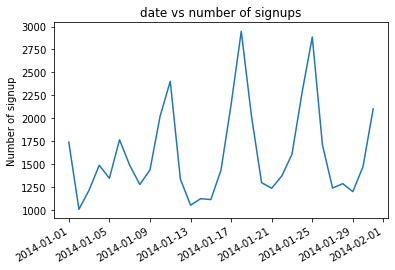

In [18]:
_=pd.to_datetime(ultimate.signup_date).value_counts().plot(title="date vs number of signups") #
_=plt.ylabel("Number of signup")

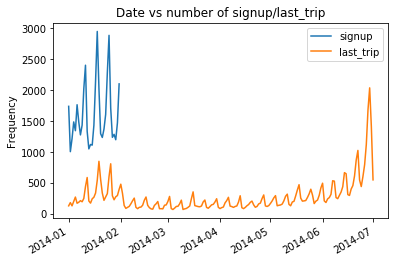

In [19]:
pd.to_datetime(ultimate.signup_date).value_counts().plot() # date vs number of signups
pd.to_datetime(ultimate.last_trip_date).value_counts().plot() # date vs number of last trip
_=plt.ylabel("Frequency")
_=plt.legend(["signup","last_trip"])
_=plt.title("Date vs number of signup/last_trip")

In [20]:
pd.to_datetime(ultimate.last_trip_date).dt.strftime("%B").value_counts()

June        18256
January     10147
May          7585
April        4588
March        4568
February     4308
July          548
Name: last_trip_date, dtype: int64

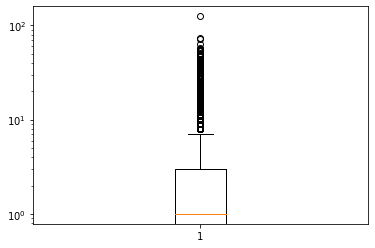

In [99]:
plt.boxplot(ultimate.trips_in_first_30_days)  
_=plt.yscale("log")

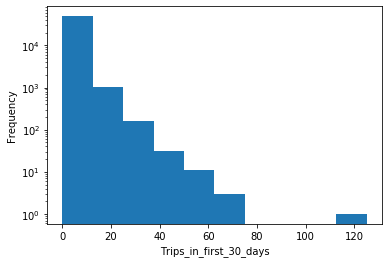

In [154]:
_=plt.hist(ultimate.trips_in_first_30_days)
_=plt.yscale("log")
_=plt.xlabel("Trips_in_first_30_days")
_=plt.ylabel("Frequency")


### What  fraction of the observed users were retained?  

 Perform    any     cleaning,     exploratory    analysis,    and/or     visualizations     to    use     the    provided  data     for     this    analysis

In [22]:
retained=len(ultimate[ultimate.trips_in_first_30_days >0]) # number of users retained 
total= ultimate.trips_in_first_30_days.shape[0]#value_counts() # total number of 
ratio= retained/total
print("Fraction of retained users = ", ratio)

Fraction of retained users =  0.6922


In [137]:
ultimate["retained"]= ultimate.trips_in_first_30_days >0

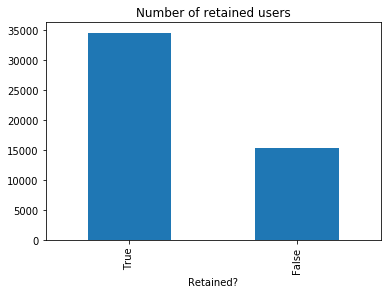

In [144]:
ultimate["retained"].value_counts().plot.bar()
_=plt.title("Number of retained users")
_=plt.xlabel("Retained?")

In [146]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,True
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,True


In [159]:
dummies= pd.get_dummies(ultimate[["city", "phone"]], drop_first=True)
dummies.head()

,city_King's Landing,city_Winterfell,phone_Unknown,phone_iPhone
0,1,0,0,1
1,0,0,0,0
2,0,0,0,1
3,1,0,0,1
4,0,1,0,0


In [162]:
cleaned=pd.concat([ultimate, dummies], axis=1)
cleaned.head(3)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_Unknown,phone_iPhone
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True,1,0,0,1
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,0,0,0,0
2,Astapor,3,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,True,0,0,0,1


In [169]:
cleaned.dropna(axis=0, inplace=True) # drop the na values

In [170]:
cleaned.shape # now the nan are droped 

(41744, 17)

### Modeling

### Data preprocessing
This section includes parsing the columns 'signup_date' and  'last_trip_date' into datetime and computing the range; creating outcome variable, spliting data into training and test dataset. 

In [172]:
# train test split

pred_var= ['avg_rating_of_driver', '', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', "city_King's Landing",
       'city_Winterfell', 'phone_Unknown', 'phone_iPhone']  # predictor variables 

X= cleaned[pred_var] # data with predictor variableavg_surge
y= cleaned["retained"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=10,stratify=y )

In [177]:
logm= LogisticRegression()

In [219]:
model=logm.fit(X_train, y_train)

C:\Users\mgaya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [220]:
pred_test= model.predict(X_test)

In [221]:
print(confusion_matrix(y_test, pred_test, labels=[True, False] ))

[[9034   14]
 [3467    9]]


In [189]:
print(classification_report(y_test, pred_test, labels=[True, False] ))

              precision    recall  f1-score   support

        True       0.72      1.00      0.84      9048
       False       0.39      0.00      0.01      3476

    accuracy                           0.72     12524
   macro avg       0.56      0.50      0.42     12524
weighted avg       0.63      0.72      0.61     12524



In [222]:
logm.coef_ # the coefincent of predictor variables 

array([[-5.58102578e-02,  3.37896699e-01, -1.58527796e-03,
         1.84706455e-01,  2.22089140e-04, -2.65782006e-02,
         4.58201267e-02, -6.37633428e-03,  2.87859399e-01,
         2.46155615e-01,  1.12506352e-02]])

In [223]:
logm.intercept_

array([0.57405854])

In [229]:
abs(logm.coef_).max() # avg_surge has the largest coefficient

0.3378966988531668

In [24]:
# Parse the columns 'signup_date' and  'last_trip_date' into datetime format
ultimate.signup_date=ultimate.signup_date.apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d")) # parse into datetime
ultimate.last_trip_date=ultimate.last_trip_date.apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))

In [25]:
ultimate.info() # now, signup_date' and  'last_trip_date' are datetime type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [72]:
# create the dependent(outcome) variable
ultimate["range_active"]= ultimate.last_trip_date- ultimate.signup_date # compute day difference 
ultimate["range_active"]= ultimate["range_active"].apply(lambda x: x.days) # clean the data to get only the number 

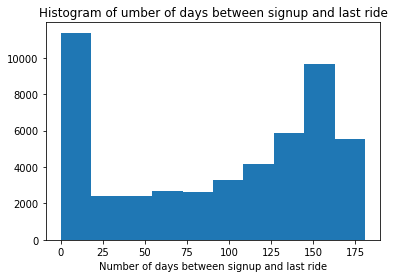

In [107]:
_=plt.hist(ultimate["range_active"].values)
_=plt.title("Histogram of umber of days between signup and last ride")
_=plt.xlabel("Number of days between signup and last ride")

In [88]:
ultimate["range_active"].describe()

count    50000.000000
mean        92.790100
std         62.129822
min          0.000000
25%         27.000000
50%        110.000000
75%        150.000000
max        181.000000
Name: range_active, dtype: float64

As we can see from range_active summary statistics the maximum range is 181 days. Thus all of the users were active within six monthes. Information about non -active users have to be available to make the model this way. 